In [1]:
# import libraries 

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# read dataset 
shirt_df = pd.read_csv('Tshirt.csv')


In [3]:
# View the head rows 
shirt_df.head()

,Height,Weight,Size
0,157,62,S
1,162,58,S
2,155,59,S
3,159,58,S
4,157,52,S


In [4]:
# View the last rows
shirt_df.tail()

,Height,Weight,Size
31,169,64,L
32,170,62,L
33,170,63,L
34,167,61,L
35,170,68,L


In [5]:
shirt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
Height    36 non-null int64
Weight    36 non-null int64
Size      36 non-null object
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [6]:
# Describe does not show details for Object
shirt_df.describe()

,Height,Weight
count,36.000000,36.000000
mean,163.333333,61.583333
std,4.282856,3.434073
min,154.000000,52.000000
25%,160.750000,59.000000
50%,163.000000,62.000000
75%,167.000000,64.000000
max,170.000000,70.000000


In [7]:
shirt_df['Size'].value_counts()

L    19
S    17
Name: Size, dtype: int64

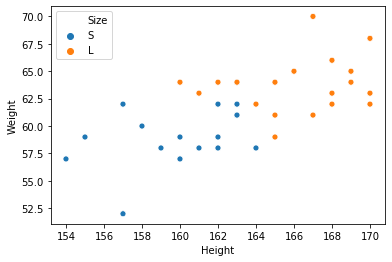

In [8]:
sns.scatterplot( x = 'Height', y = 'Weight', hue = 'Size', data = shirt_df)


In [9]:
#c_map = {'S': 'b', 'L': 'r'}
#plt.scatter( x = shirt_df.Height, y = shirt_df.Weight, c=[c_map[_] for _ in shirt_df.Size])

In [10]:
# Drop the Species (target label) coloumn
X = shirt_df.drop(['Size'],axis=1)

X.head()

,Height,Weight
0,157,62
1,162,58
2,155,59
3,159,58
4,157,52


In [11]:
y = shirt_df['Size']
y.head()

0    S
1    S
2    S
3    S
4    S
Name: Size, dtype: object

In [12]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [13]:
X_train.head()

,Height,Weight
35,170,68
33,170,63
28,168,63
32,170,62
8,160,57


In [14]:
y_train.head()

35    L
33    L
28    L
32    L
8     S
Name: Size, dtype: object

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  


In [ ]:

#scaler.fit(X_train)  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)


In [ ]:
# Predict the values of classified for Test data
y_predict = classifier.predict(X_test)

In [ ]:
# show result 
# PK: This step need NOT be done once you get familiar. Only for initially to demonstrate

result = {"Actual": y_test, "Predicted": y_predict}
pd.DataFrame(result)

In [ ]:
# PK: This is not needed. Only for showing in training at initial stages

#Display total counts
print ("Actual")
print (y_test.value_counts())

print("===========================")
print(" ")
print("Predicted")
print(pd.Series(y_predict).value_counts())

In [ ]:
metrics.accuracy_score(y_test, y_predict)